In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Readme-Images-Final-test.txt
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/08576.ppm
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/03557.ppm
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/05320.ppm
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/10797.ppm
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/11260.ppm
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/03142.ppm
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/04072.ppm
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/09495.ppm
/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_

# Importing Libraries

In [3]:
import PIL
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00042/GT-00042.csv", sep=";")  
df.head()

Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
0  00000_00000.ppm     27      28       5       6      22      23       42
1  00000_00001.ppm     29      27       6       5      23      22       42
2  00000_00002.ppm     29      29       6       6      24      24       42
3  00000_00003.ppm     28      29       5       6      23      24       42
4  00000_00004.ppm     31      29       5       5      25      24       42

In [5]:
df.shape

(240, 8)

In [6]:
df.nunique()

Filename    240
Width        51
Height       49
Roi.X1        5
Roi.Y1        6
Roi.X2       50
Roi.Y2       50
ClassId       1
dtype: int64

In [7]:
df = pd.DataFrame()
for i in range(43):
    if i<10:
        df_image = pd.read_csv(f"/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/0000{i}/GT-0000{i}.csv", sep=";")  
        df = pd.concat([df,df_image],axis=0)
    else:
        df_image = pd.read_csv(f"/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/000{i}/GT-000{i}.csv", sep=";")  
        df = pd.concat([df,df_image],axis=0)
df.reset_index(drop=True,inplace=True)
print(df.shape)

(39209, 8)


In [8]:
df_2 = df[['Filename','ClassId']]
df_2.shape

(39209, 2)

In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  39209 non-null  object
 1   ClassId   39209 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 612.8+ KB


In [10]:
df_2['Path']=0
for i in range(len(df_2)):
    if df_2['ClassId'][i]<10:
        df_2['Path'].iloc[i] = f"/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/0000{df_2['ClassId'][i]}/{df_2['Filename'][i]}"
    else:
        df_2['Path'].iloc[i] = f"/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/000{df_2['ClassId'][i]}/{df_2['Filename'][i]}"

In [11]:
df_2[df_2.duplicated()]

Empty DataFrame
Columns: [Filename, ClassId, Path]
Index: []

In [12]:
shuffled_df = df_2.sample(frac=1).reset_index(drop=True)
shuffled_df.head(10)

Filename  ClassId                                               Path
0  00002_00027.ppm       33  /kaggle/input/german-traffic-sign-recognition/...
1  00008_00020.ppm       11  /kaggle/input/german-traffic-sign-recognition/...
2  00015_00016.ppm       15  /kaggle/input/german-traffic-sign-recognition/...
3  00011_00026.ppm        1  /kaggle/input/german-traffic-sign-recognition/...
4  00010_00023.ppm       30  /kaggle/input/german-traffic-sign-recognition/...
5  00064_00003.ppm        1  /kaggle/input/german-traffic-sign-recognition/...
6  00003_00010.ppm       36  /kaggle/input/german-traffic-sign-recognition/...
7  00033_00008.ppm        9  /kaggle/input/german-traffic-sign-recognition/...
8  00016_00017.ppm        5  /kaggle/input/german-traffic-sign-recognition/...
9  00024_00018.ppm        2  /kaggle/input/german-traffic-sign-recognition/...

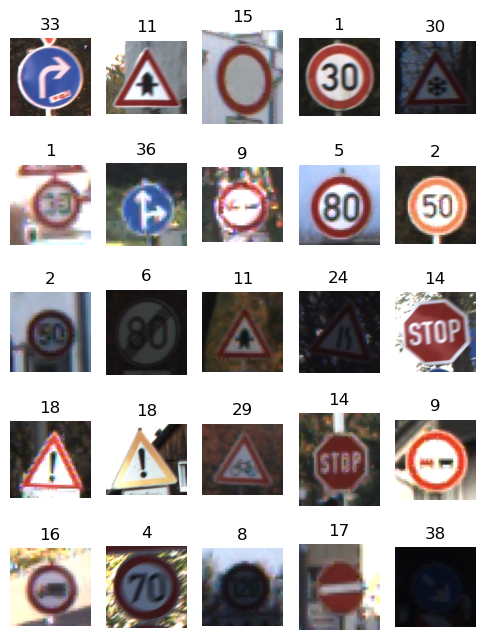

In [13]:
plt.figure(figsize=(6,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    image = PIL.Image.open(shuffled_df['Path'][i])
    plt.title(shuffled_df['ClassId'][i])
    plt.imshow(image)
    plt.axis('off')

In [14]:
dataset = pd.concat([df_2[['Filename','Path']],df[['Width','Height','Roi.X1','Roi.Y1','Roi.X2','Roi.Y2']], df_2['ClassId']],axis=1)
dataset.head(5)

Filename                                               Path  Width  \
0  00000_00000.ppm  /kaggle/input/german-traffic-sign-recognition/...     29   
1  00000_00001.ppm  /kaggle/input/german-traffic-sign-recognition/...     30   
2  00000_00002.ppm  /kaggle/input/german-traffic-sign-recognition/...     30   
3  00000_00003.ppm  /kaggle/input/german-traffic-sign-recognition/...     31   
4  00000_00004.ppm  /kaggle/input/german-traffic-sign-recognition/...     30   

   Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  
0      30       5       6      24      25        0  
1      30       5       5      25      25        0  
2      30       5       5      25      25        0  
3      31       5       5      26      26        0  
4      32       5       6      25      26        0

In [15]:
dataset.to_csv("image_dataset.csv", index=None)

In [16]:
X = df_2['Path']
y = df_2['ClassId']

In [17]:
df_2.shape

(39209, 3)

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify = y)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((31367,), (31367,), (7842,), (7842,))

In [19]:
y.nunique(), y_valid.nunique(), y_train.nunique()

(43, 43, 43)

In [20]:
X_train = pd.DataFrame(X_train)
X_train.reset_index(drop=True, inplace=True)
X_valid = pd.DataFrame(X_valid)
X_valid.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_valid.reset_index(drop=True, inplace=True)

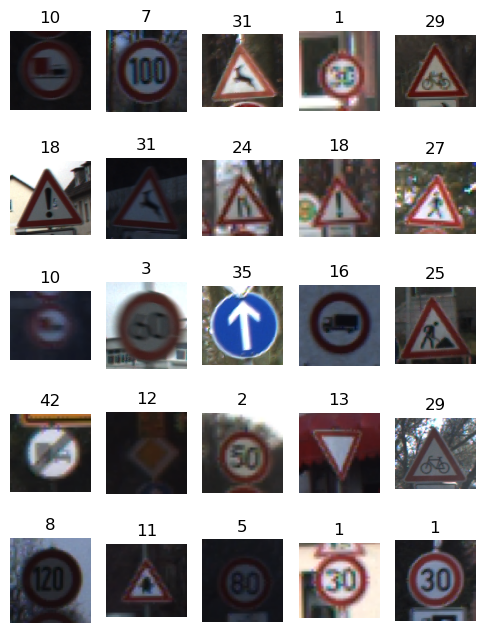

In [21]:
plt.figure(figsize=(6,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    image = PIL.Image.open(X_train['Path'][i])
    plt.title(y_train[i])
    plt.imshow(image)
    plt.axis('off')

In [22]:
train_ds = pd.concat([X_train, y_train], axis=1)
valid_ds = pd.concat([X_valid, y_valid], axis=1)

In [23]:
train_ds

Path  ClassId
0      /kaggle/input/german-traffic-sign-recognition/...       10
1      /kaggle/input/german-traffic-sign-recognition/...        7
2      /kaggle/input/german-traffic-sign-recognition/...       31
3      /kaggle/input/german-traffic-sign-recognition/...        1
4      /kaggle/input/german-traffic-sign-recognition/...       29
...                                                  ...      ...
31362  /kaggle/input/german-traffic-sign-recognition/...       38
31363  /kaggle/input/german-traffic-sign-recognition/...       14
31364  /kaggle/input/german-traffic-sign-recognition/...       13
31365  /kaggle/input/german-traffic-sign-recognition/...        8
31366  /kaggle/input/german-traffic-sign-recognition/...        9

[31367 rows x 2 columns]

In [24]:
height, width = 50,50

def preprocess_image(image_path):
    image = PIL.Image.open(image_path)
    image = image.resize((height, width))
    image = np.array(image)/255  # Normalize pixel values
    return image


train_ds['Image'] = train_ds['Path'].apply(preprocess_image)
valid_ds['Image'] = valid_ds['Path'].apply(preprocess_image)


X_train = np.array(train_ds['Image'].tolist())
y_train = np.array(train_ds['ClassId'])
X_valid = np.array(valid_ds['Image'].tolist())
y_valid = np.array(valid_ds['ClassId'])

In [31]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_valid), X_valid.shape)
print(type(y_valid), y_valid.shape)

<class 'numpy.ndarray'> (31367, 50, 50, 3)
<class 'numpy.ndarray'> (31367,)
<class 'numpy.ndarray'> (7842, 50, 50, 3)
<class 'numpy.ndarray'> (7842,)


# Keras Tuning the Model

In [32]:
def build_model(hp):
    model = keras.Sequential()
    
    for i in range(hp.Int('conv_layers', 2, 5)):
        model.add(layers.Conv2D(
            filters=hp.Int('filters_' + str(i), 16, 128, step=32),
            kernel_size=hp.Choice('kernel_' + str(i), [3, 5]),
            activation='relu', input_shape=(50,50, 3)
        ))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    
    for j in range(hp.Int('num_dense_layers', min_value=1, max_value=3, step=1)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_{j}_units', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        
    model.add(layers.Dense(43, activation='softmax'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=7,
    directory='tuner_director',
    project_name='gstrb_tuning'
)

tuner.search(X_train, y_train, validation_data=(X_valid, y_valid),epochs=5, batch_size=64)

Trial 7 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.9720734357833862
Total elapsed time: 00h 02m 21s


In [33]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [34]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 48)        3648      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 80)        96080     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 80)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6480)              0         
                                                                 
 dense (Dense)               (None, 352)               2

In [35]:
best_hyperparameters.values

{'conv_layers': 2,
 'filters_0': 48,
 'kernel_0': 5,
 'filters_1': 80,
 'kernel_1': 5,
 'num_dense_layers': 1,
 'dense_0_units': 352,
 'learning_rate': 0.0001,
 'filters_2': 48,
 'kernel_2': 5,
 'filters_3': 48,
 'kernel_3': 5,
 'dense_1_units': 352}

# Best Model

In [40]:
models = Sequential([
    layers.Conv2D(filters=48, kernel_size=(5,5), activation='relu', input_shape = (50,50,3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=80, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=48, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(352, activation='relu'),
    layers.Dense(43, activation='softmax')
])
models.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 48)        3648      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 48)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 19, 19, 80)        96080     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 80)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 48)          96048     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 48)        

In [41]:
models.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [42]:
hist = models.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=15, batch_size=64)

Epoch 1/15
491/491 [==============================] - 6s 9ms/step - loss: 2.5680 - accuracy: 0.3634 - val_loss: 1.4025 - val_accuracy: 0.6460
Epoch 2/15
491/491 [==============================] - 4s 8ms/step - loss: 0.9366 - accuracy: 0.7704 - val_loss: 0.6457 - val_accuracy: 0.8461
Epoch 3/15
491/491 [==============================] - 4s 7ms/step - loss: 0.4952 - accuracy: 0.8837 - val_loss: 0.4070 - val_accuracy: 0.9023
Epoch 4/15
491/491 [==============================] - 4s 8ms/step - loss: 0.3338 - accuracy: 0.9218 - val_loss: 0.3215 - val_accuracy: 0.9217
Epoch 5/15
491/491 [==============================] - 4s 8ms/step - loss: 0.2426 - accuracy: 0.9438 - val_loss: 0.2496 - val_accuracy: 0.9403
Epoch 6/15
491/491 [==============================] - 4s 7ms/step - loss: 0.1865 - accuracy: 0.9569 - val_loss: 0.2045 - val_accuracy: 0.9531
Epoch 7/15
491/491 [==============================] - 4s 8ms/step - loss: 0.1496 - accuracy: 0.9655 - val_loss: 0.1706 - val_accuracy: 0.9648
Epoch 

In [43]:
hist2 = models.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=17, batch_size=64, initial_epoch=15)

Epoch 16/17
491/491 [==============================] - 4s 8ms/step - loss: 0.0324 - accuracy: 0.9934 - val_loss: 0.0909 - val_accuracy: 0.9848
Epoch 17/17
491/491 [==============================] - 4s 8ms/step - loss: 0.0254 - accuracy: 0.9939 - val_loss: 0.0903 - val_accuracy: 0.9833


In [45]:
hist3 = models.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=18, batch_size=64, initial_epoch=17)

Epoch 18/18
491/491 [==============================] - 4s 9ms/step - loss: 0.0254 - accuracy: 0.9942 - val_loss: 0.1124 - val_accuracy: 0.9795


In [46]:
hist4 = models.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=64, initial_epoch=18)

Epoch 19/20
491/491 [==============================] - 4s 9ms/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.0811 - val_accuracy: 0.9871
Epoch 20/20
491/491 [==============================] - 4s 8ms/step - loss: 0.0199 - accuracy: 0.9959 - val_loss: 0.0814 - val_accuracy: 0.9869


In [47]:
models.save('gstrb_models.h5')

# Visualising the Loss & Accuracy

In [48]:
training_accuracy = hist.history['accuracy'] + hist2.history['accuracy'] + hist3.history['accuracy']+hist4.history['accuracy']
validation_accuracy = hist.history['val_accuracy'] + hist2.history['val_accuracy'] + hist3.history['val_accuracy']+hist4.history['val_accuracy']

training_loss = hist.history['loss'] + hist2.history['loss'] + hist3.history['loss']+hist4.history['loss']
validation_loss = hist.history['val_loss'] + hist2.history['val_loss'] + hist3.history['val_loss']+hist4.history['val_loss']


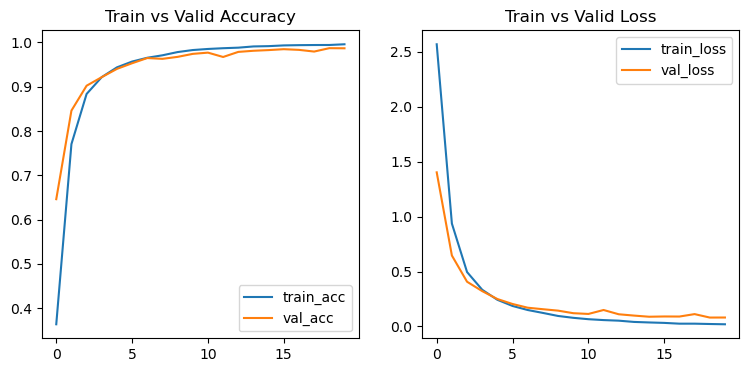

In [60]:

fig, ax = plt.subplots(1,2, figsize=(9,4))
ax = ax.ravel()
sns.lineplot(training_accuracy, ax=ax[0], label = 'train_acc')
sns.lineplot(validation_accuracy, ax=ax[0], label = 'val_acc')
ax[0].set_title("Train vs Valid Accuracy")
sns.lineplot(training_loss, ax=ax[1], label = 'train_loss')
sns.lineplot(validation_loss, ax=ax[1], label = 'val_loss')
ax[1].set_title("Train vs Valid Loss")
plt.show()

# Testing The Model

In [108]:
class_label = {
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons' }
    

In [110]:
test = pd.read_csv("/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/GT-final_test.test.csv", sep=";")
print(test.shape)
test.head()

(12630, 7)


Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2
0  00000.ppm     53      54       6       5      48      49
1  00001.ppm     42      45       5       5      36      40
2  00002.ppm     48      52       6       6      43      47
3  00003.ppm     27      29       5       5      22      24
4  00004.ppm     60      57       5       5      55      52

In [120]:
files = []
for i in range(0,12630,254):
    files.append(test['Filename'][i])

In [121]:
imges = []
title = []
for index, file in enumerate(files):
    img = PIL.Image.open(f"/kaggle/input/german-traffic-sign-recognition/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/{file}")
    img_res = img.resize((50,50))
    img_arr = np.array(img_res)/255
    imges.append(img_arr)
    img_arr = np.expand_dims(img_arr,0)
    prediction = models.predict(img_arr)
    title.append(np.argmax(prediction))

1/1 [==============================] - 0s 18ms/step


In [152]:
test_img = list(zip(imges,title))
random.shuffle(test_img)

X, y = zip(*test_img)
test_imges = list(X)
test_labl = list(y)

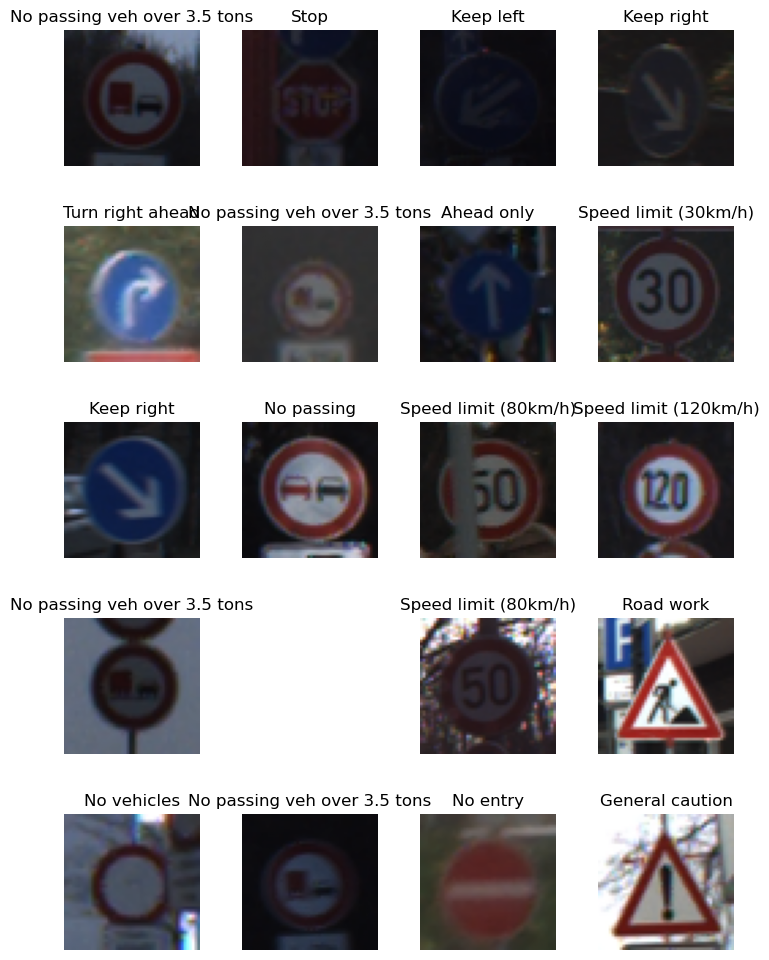

In [157]:
plt.figure(figsize=(7,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(test_imges[i])
    plt.title(class_label[test_labl[i]])
    plt.tight_layout()
    plt.axis('off')

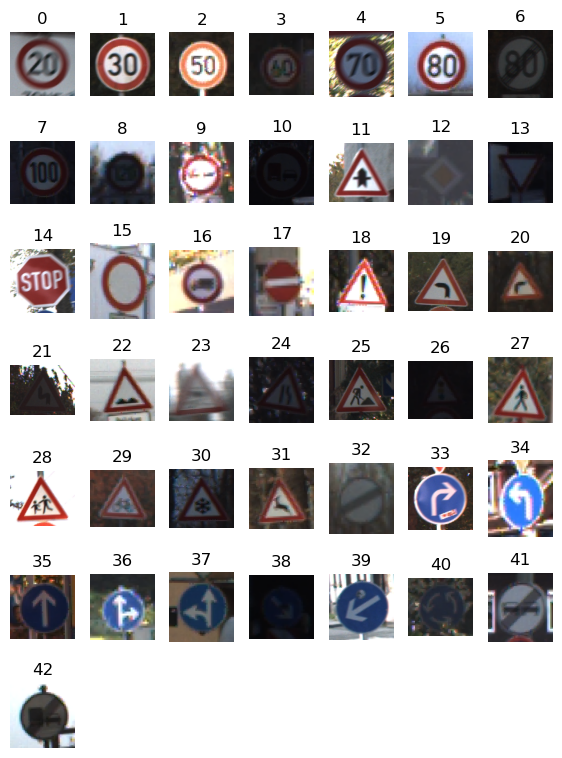

In [73]:
plt.figure(figsize=(6,8))
for i in range(43):
    plt.subplot(7,7,i+1)
    plt.imshow(PIL.Image.open(shuffled_df['Path'][shuffled_df[shuffled_df['ClassId']==i].index[0]]))
    plt.title(i)
    plt.tight_layout()
    plt.axis('off')